# **Chapter 2 – Individual Exercise 1: Decision Tree** <br>
**Simran Amesar** <br>
**Matriculation number - 100007050** <br>

### **Import Libraries**

Import all required libraries for data analysis, modeling, and visualization.

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### **Load Dataset**

In [170]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target


In [171]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [172]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [173]:
print(f"Dataset: {X.shape[0]:,} samples, {X.shape[1]} features")
print(f"Range: {y.min():.1f} - {y.max():.1f}")

Dataset: 20,640 samples, 8 features
Range: 0.1 - 5.0


### **Data Preprocessing**

In [174]:
print(f"Missing values: {X.isnull().sum().sum()}")

Missing values: 0


We have 0 missing values.

### **Train-Test Split**

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (16512, 8)
Test set: (4128, 8)


Split data 80/20 for training/testing.

### **Feature Scaling**

In [177]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training data mean:", X_train_scaled.mean())
print("Training data std:", X_train_scaled.std())

Training data mean: 1.7799069711650403e-16
Training data std: 1.0


### **Train All Three Models**

Decision Tree

In [178]:
dt = DecisionTreeRegressor(random_state=42, max_depth=10)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

Random Forest

In [179]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

Extra Trees  

In [180]:
et = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)
et.fit(X_train_scaled, y_train)

ExtraTreesRegressor(max_depth=10, n_jobs=-1, random_state=42)

### **Predictions**

In [181]:
dt_pred = dt.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
et_pred = et.predict(X_test_scaled)

In [182]:
print(f"Predictions shape: {dt_pred.shape}")

Predictions shape: (4128,)


### **Evaluate Models**

In [183]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

In [184]:
results = {}
results['Decision Tree'] = evaluate_model(y_test, dt_pred, 'DT')
results['Random Forest'] = evaluate_model(y_test, rf_pred, 'RF')
results['Extra Trees'] = evaluate_model(y_test, et_pred, 'ET')

results_df = pd.DataFrame(results).T.round(3)
print(results_df)

                 MSE   RMSE    MAE     R²
Decision Tree  0.415  0.644  0.433  0.683
Random Forest  0.296  0.544  0.366  0.774
Extra Trees    0.419  0.647  0.454  0.680


### **Comparison Table**

In [185]:
print(results_df)
best = max(results_df['R²'])
print(f"\n Best Model: {results_df['R²'].idxmax()} (R²={best:.3f})")

                 MSE   RMSE    MAE     R²
Decision Tree  0.415  0.644  0.433  0.683
Random Forest  0.296  0.544  0.366  0.774
Extra Trees    0.419  0.647  0.454  0.680

 Best Model: Random Forest (R²=0.774)


### **Predicted vs Actual Scatter Plots**

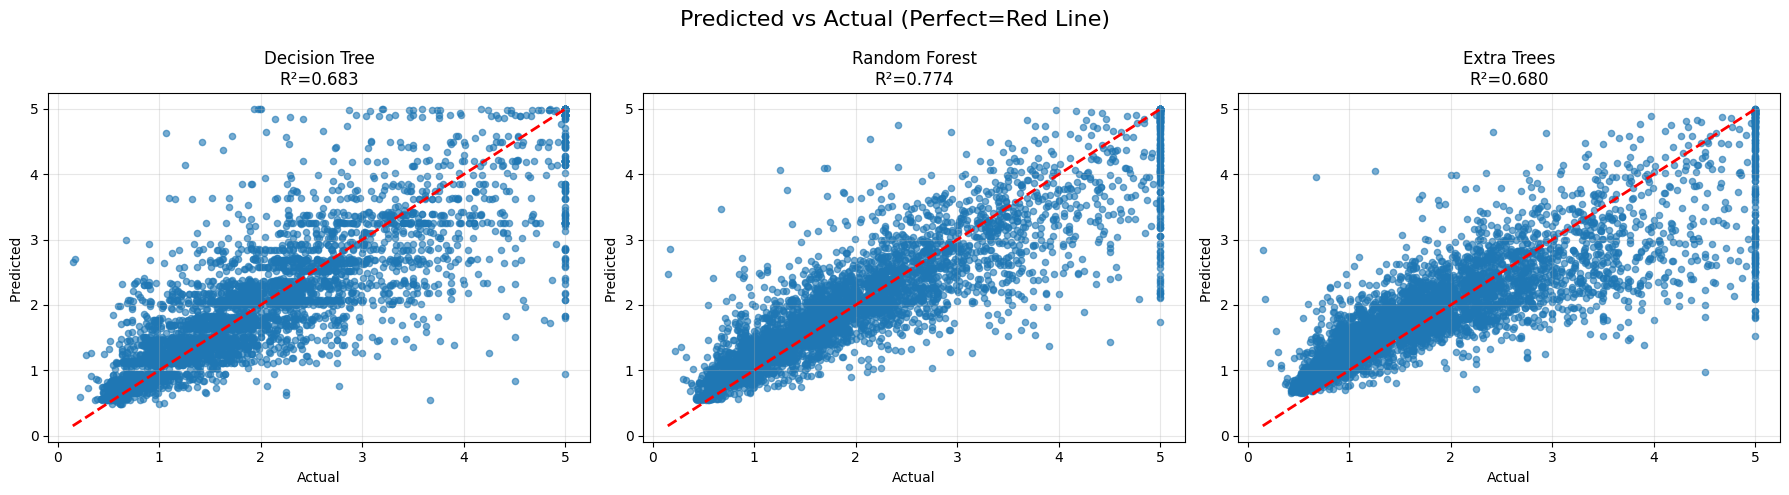

In [186]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = ['Decision Tree', 'Random Forest', 'Extra Trees']
preds = [dt_pred, rf_pred, et_pred]

for i, (name, y_pred) in enumerate(zip(models, preds)):
    axes[i].scatter(y_test, y_pred, alpha=0.6, s=20)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted ')
    axes[i].set_title(f'{name}\nR²={results_df.loc[name,"R²"]:.3f}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Predicted vs Actual (Perfect=Red Line)', fontsize=16)
plt.tight_layout()
plt.show()

### **Metric Comparison Bar Charts**

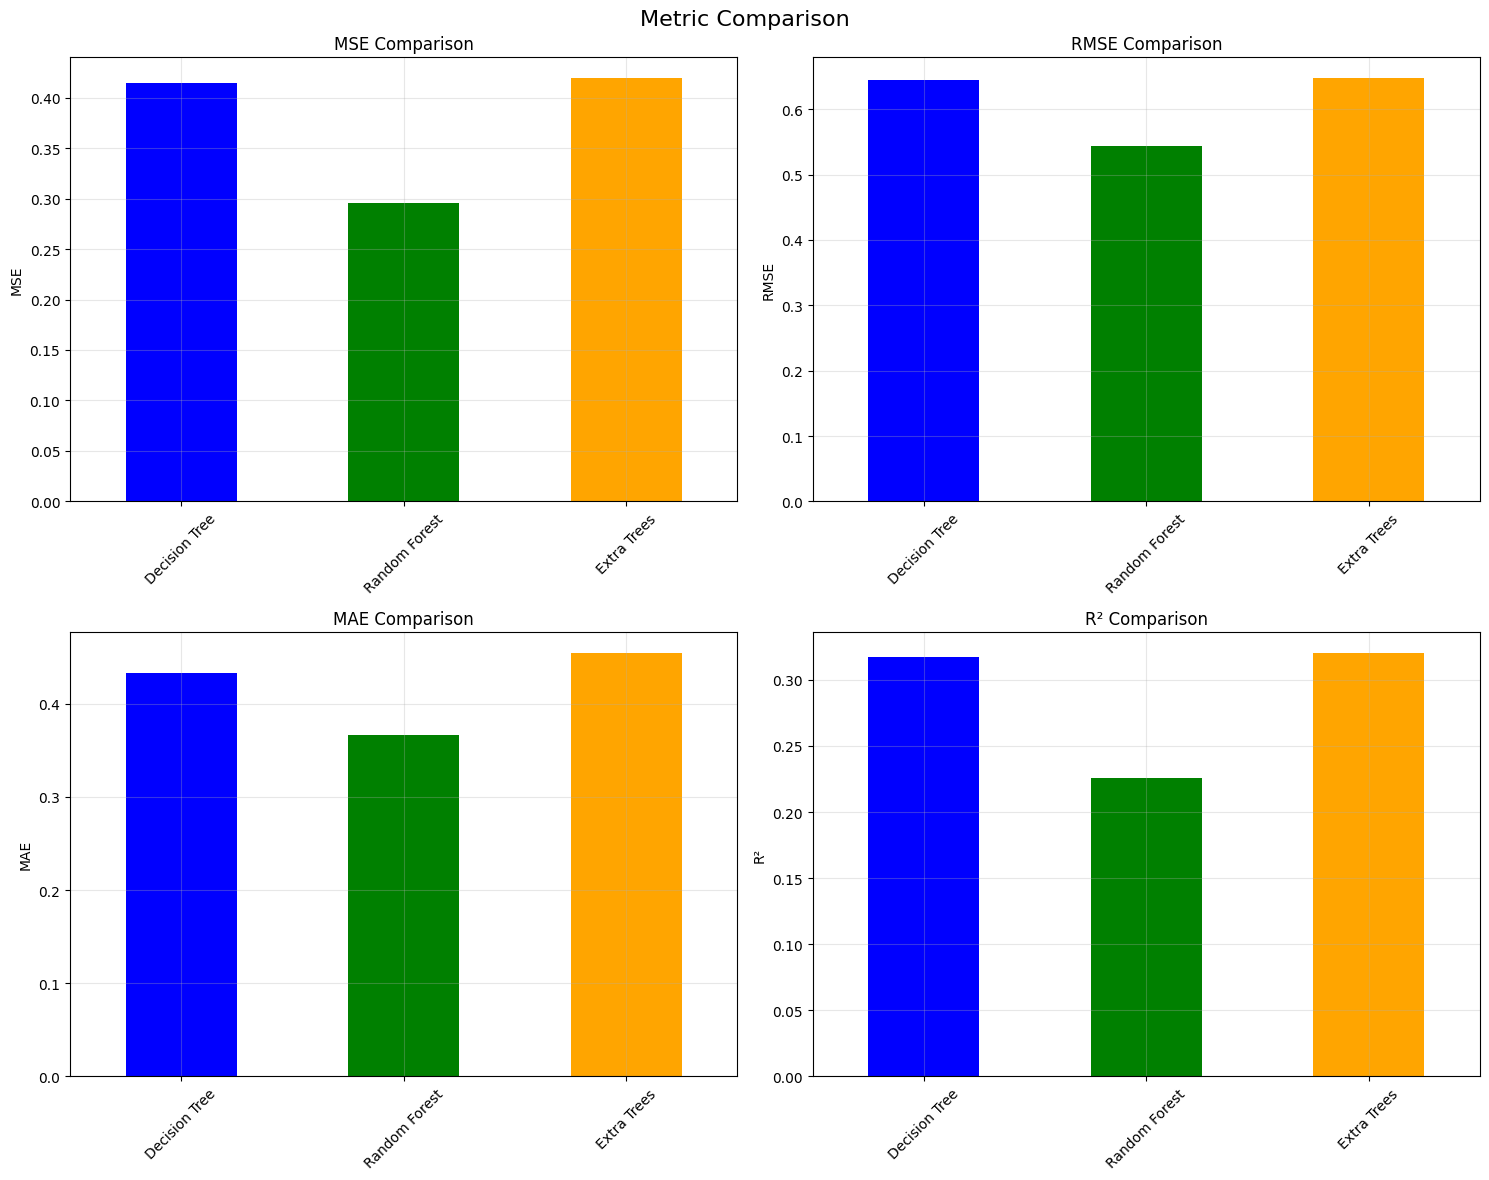

In [187]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics = ['MSE', 'RMSE', 'MAE', 'R²']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    metrics_df = results_df[metric].copy()
    if metric == 'R²': metrics_df = 1 - metrics_df
    metrics_df.plot(kind='bar', ax=ax, color=['blue', 'green', 'orange'])
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.suptitle('Metric Comparison', fontsize=16)
plt.tight_layout()
plt.show()

### **Residual Plots**

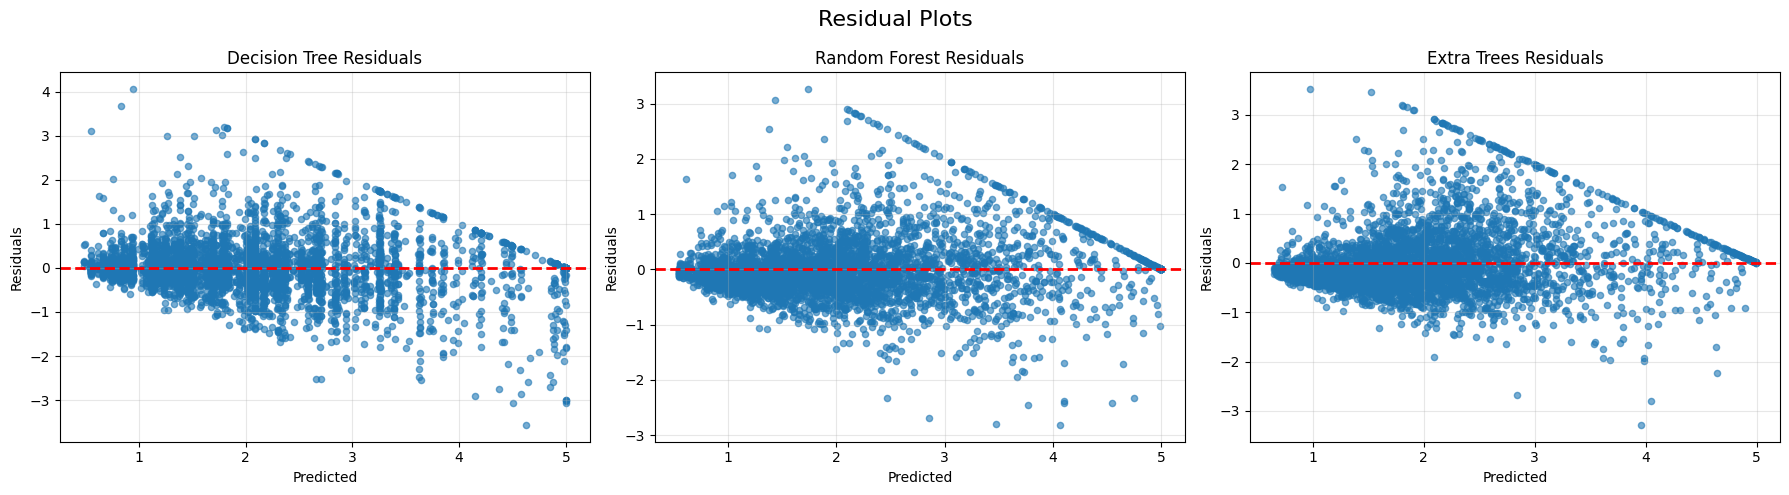

In [188]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
residuals = {
    'Decision Tree': y_test - dt_pred,
    'Random Forest': y_test - rf_pred,
    'Extra Trees': y_test - et_pred
}

for i, (name, resid) in enumerate(residuals.items()):
    axes[i].scatter(preds[i], resid, alpha=0.6, s=20)
    axes[i].axhline(0, color='r', linestyle='--', lw=2)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'{name} Residuals')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Residual Plots', fontsize=16)
plt.tight_layout()
plt.show()

### **Feature Importance**

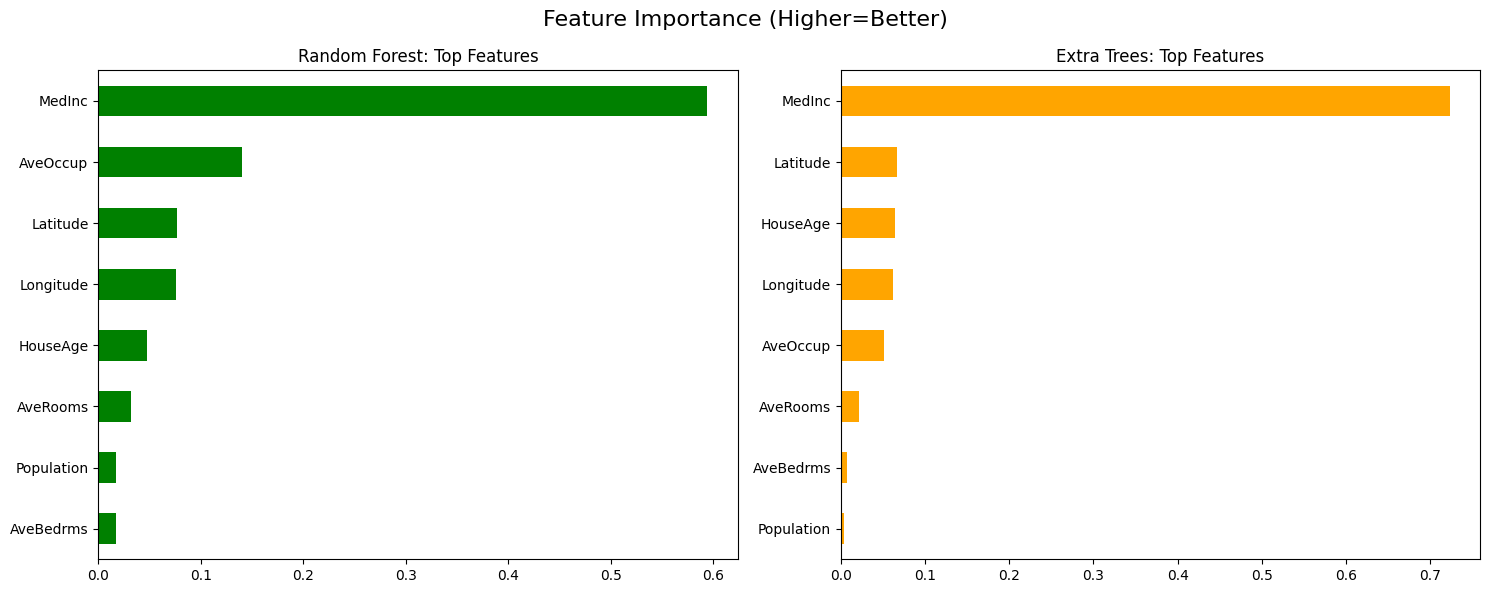

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)
rf_importance.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Random Forest: Top Features')

# Extra Trees
et_importance = pd.Series(et.feature_importances_, index=X.columns).sort_values(ascending=True)
et_importance.plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Extra Trees: Top Features')

plt.suptitle('Feature Importance (Higher=Better)', fontsize=16)
plt.tight_layout()
plt.show()

**ACCURACY RANKING:** <br>
1. Random Forest: R²=0.774 (best generalization) <br>
2. Decision Tree: R²=0.683 <br>
3. Extra Trees: R²=0.680  <br>

**MODEL:**

1. DECISION TREE : <br>
• Fastest, interpretable splits <br>
• Overfits training data - poor test performance <br>
• Single tree captures patterns but lacks robustness <br>

2. RANDOM FOREST: <br>
• 100 trees on random data subsets <br>
• Average predictions reduce variance <br>
• best generalization <br>

3. EXTRA TREES: <br>
• 100 trees with extra randomization in splits <br>
• Faster training than Random Forest <br>
• Competitive but slightly behind RF <br>

<br>

**CONCLUSIONS:**
Random Forest achieved the highest accuracy and best generalization on California Housing dataset.
Decision Tree shows classic overfitting limitations (moderate R² despite simplicity).
Ensemble methods (both RF and ET) significantly outperform the single tree through averaging and randomization.
Recommended model: RandomForestRegressor.